## Data Cleaning Steps in Python

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Data Collection and Inspection

In [3]:
# Importing the data 
data = pd.read_csv(r"C:\Users\ANCHIT SAXENA\OneDrive\Desktop\python\Data\messy_customer_sales_data.csv")

In [4]:
# Shape of the data
print("Shape (rows, cols):", data.shape)

Shape (rows, cols): (10200, 12)


In [5]:
# First 5 rows of the data 
data.head()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,26-06-2025,17-05-2025,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,17-02-2021,22-07-2025,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,05-11-2023,08-12-2024,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,13-03-2022,02-10-2025,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,05-04-2024,15-12-2024,NaN,8.0,denise84@example.org,2665569480,India


In [6]:
# Last 5 rows of the data
data.tail()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,08-12-2020,25-01-2025,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53,bangalore,31-12-2023,07-05-2025,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25,hyderabad,15-02-2022,11-01-2025,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,NaN,16-03-2021,14-05-2025,18827.0,10.0,dawn84@example.org,2987564247,InDia
10199,CUST6588,David Potter,female,34,HYDERABAD,12-10-2020,27-06-2025,35211.0,10.0,kochjonathan@example.org,1926206725,India


In [7]:
# Data Type and count values of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


Using the info method we found that the age, signup and last purchase date having different data type ie object type we need to change it into number and date data type 

In [8]:
# Summery Statistics 
data.describe().round(2)

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.00,9177.00,1.020000e+04
mean,29090.13,5.48,4.979974e+09
std,208697.09,2.87,2.902593e+09
min,-500.00,1.00,9.208990e+05
25%,12295.00,3.00,2.449157e+09
50%,24330.00,5.00,4.988639e+09
75%,37130.00,8.00,7.510448e+09
max,9999999.00,10.00,9.994402e+09


From this we found the presence of the outlier in our dataset, Purchase amount having the maximum value of 9999999.00 while 75% of the data is lie near by 37130.00 and their mean is 29090.13 and their is huge difference between mean and max amount.

In [9]:
# Missing values count

Missing_value = data.isnull().sum()
Missing_percent = (Missing_value / len(data) * 100).round(2)
missing_summary = pd.concat([Missing_value, Missing_percent], axis=1)
missing_summary.columns = ['missing_count', 'missing_percent']
print(missing_summary.to_string())

                    missing_count  missing_percent
Customer_ID                  1023            10.03
Name                            0             0.00
Gender                       1026            10.06
Age                           951             9.32
City                         1016             9.96
Signup_Date                     0             0.00
Last_Purchase_Date           1012             9.92
Purchase_Amount              1021            10.01
Feedback_Score               1023            10.03
Email                           0             0.00
Phone_Number                    0             0.00
Country                       732             7.18


In [10]:
# Duplicate Row Summery
data[data.duplicated()].shape

(15, 12)

In [11]:
# Duplicate Data
data[data.duplicated()]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2032,CUST2755,Casey Campbell,male,NaN,Hyderabad,01-12-2023,04-11-2024,11778.0,3.0,joseph49@example.com,3844741384,India
3191,NaN,Travis Schneider,f,51,NaN,20-04-2025,28-02-2025,48750.0,5.0,bianca77@example.net,7623118785,India
4312,CUST8305,Stanley Cain,FEMALE,51,Bangalore,14-08-2023,01-11-2024,11432.0,6.0,calderonbrenda@example.org,4889366037,India
5611,CUST6288,Jonathon Kim,male,46,Chennai,22-11-2023,21-03-2025,3301.0,6.0,tparker@example.com,5266662560,India
5680,CUST2695,Lisa Durham,NaN,46,Chennai,18-04-2021,10-10-2024,6511.0,3.0,andrew34@example.com,2235480149,India
5899,CUST8841,Amanda Hill,NaN,34,chennai,11-09-2022,13-03-2025,42092.0,4.0,ryanriley@example.net,3466026146,India
6070,CUST10780,Emily Smith,NaN,23,Kolkata,09-12-2023,28-10-2024,18027.0,5.0,perezchristopher@example.com,3032282870,India
6240,CUST9745,David Morales,NaN,56,NaN,18-02-2023,14-12-2024,49107.0,7.0,juliaknapp@example.com,9436163110,India
6425,CUST4631,George Villa,m,26,Mumbai,21-05-2022,17-06-2025,NaN,8.0,davidmarquez@example.com,8869465862,India
6498,CUST1711,Stephanie Elliott,NaN,44,MUMBAI,17-05-2023,12-07-2025,11349.0,9.0,nfischer@example.com,3270872546,NaN


In [12]:
# Let also check the duplicate value for customer_id since it should be unique 
data['Customer_ID'].value_counts()

Customer_ID
CUST3344     2
CUST4893     2
CUST7000     2
CUST10824    2
CUST2695     2
            ..
CUST7857     1
CUST3881     1
CUST1565     1
CUST9038     1
CUST5957     1
Name: count, Length: 9000, dtype: int64

In [13]:
data[data['Customer_ID'] == 'CUST3344']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
4483,CUST3344,John Russell,M,65,MUMBAI,21-11-2023,10-08-2025,36235.0,8.0,sandra86@example.org,4225788150,India
6218,CUST3344,John Russell,male,65,Mumbai,21-11-2023,10-08-2025,36235.0,8.0,sandra86@example.org,4225788150,India


here we can see that city is inconsistant while both are same in meaning still is it not fatched in the duplicate rows

In [14]:
# Let check the column values present in our data set
for col in data.columns:
    if data[col].nunique() <20:
        print(data[col].value_counts())
        print('-'*50)
        

Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
--------------------------------------------------
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
--------------------------------------------------
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64
--------------------------------------------------


Till here we are able to find the all error values which are present in our dataset, now let handle these errors

### Handlling Null Values

In [15]:
# Make the copy of the dataset to keep safe our original data
data_clean = data.copy()

In [16]:
# Dropping the customer_id which having the nulll values 
data_clean.dropna(subset=['Customer_ID'],inplace= True)
data_clean.shape

(9177, 12)

In [17]:
# Cheking the unique values of the column
data_clean['Age'].unique()

# Here we found that age are in many differrnt format so to correct it first we make age into number 

array(['52', '51.0 years', '62', '40', '41', nan, '18', '43.0 years',
       '40.0 years', '26', '32', '22', '59', '65', '61', '31',
       '54.0 years', '55', '69', '61.0 years', '24', '63', '19', '50',
       '56', '36', '68', '43', '38', '27', '57.0 years', '23', '25', '66',
       '28', '30', '46', '48', '20', '37', '67', '51', '35', '58', '29',
       'nan years', '39', '49', '47', '42', '44', '64', '53', '60',
       '59.0 years', '45', '21', '34', '54', '48.0 years', '46.0 years',
       '33', '57', '30.0 years', '58.0 years', '35.0 years', '34.0 years',
       '69.0 years', '250', '19.0 years', '27.0 years', '53.0 years',
       '65.0 years', '66.0 years', '44.0 years', '49.0 years',
       '25.0 years', '23.0 years', '62.0 years', '41.0 years',
       '33.0 years', '28.0 years', '22.0 years', '20.0 years',
       '42.0 years', '45.0 years', '3', '63.0 years', '37.0 years',
       '38.0 years', '55.0 years', '18.0 years', '36.0 years',
       '67.0 years', '29.0 years', '39.0 y

In [18]:
import re
def extract_age(age):
    age_num = re.findall('[0-9]+',str(age))
    if len(age_num) > 0:
        return age_num[0]
    else:
        return age

In [19]:
data_clean['Age'] = data_clean['Age'].apply(lambda x : extract_age(x))
data_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,26-06-2025,17-05-2025,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,NaN,17-02-2021,22-07-2025,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,05-11-2023,08-12-2024,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,13-03-2022,02-10-2025,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,05-04-2024,15-12-2024,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,NaN,21-08-2024,26-10-2024,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,08-12-2020,25-01-2025,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,15-02-2022,11-01-2025,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,NaN,16-03-2021,14-05-2025,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [20]:
data_clean['Age'].unique()

array(['52', '51', '62', '40', '41', nan, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', 'nan years', '39',
       '49', '47', '42', '44', '64', '53', '60', '45', '21', '34', '33',
       '250', '3', '10'], dtype=object)

In [49]:
df_age  = data_clean[data_clean['Age'] != 'nan years']['Age']

In [50]:
age_median = int(df_age.dropna().astype('int64').median())
age_median

43

In [51]:
# replace nan with median age and extracting numbers 
data_clean.replace('nan years', age_median, inplace= True)

In [ ]:
# Filling the Null value with the median value of the column
# For Age column
data_clean['Age'].fillna(age_median, inplace=True)

# For Purchase amount column
data_clean['Purchase_Amount'].fillna(data_clean['Purchase_Amount'].median(),inplace= True)

In [ ]:
# Fill categorical columns with mode

data_clean['Feedback_Score'].fillna(data_clean['Feedback_Score'].mode()[0],inplace=True)

In [ ]:
# Fill categorical columns with mode

data_clean['Feedback_Score'].fillna(data_clean['Feedback_Score'].mode()[0],inplace=True)

In [ ]:
# Fill categorical columns with mode in single run

for col in ['Gender', 'City', 'Country']:
    data_clean[col].fillna(data_clean[col].mode()[0],inplace= True)

In [ ]:
# Let fill the date column with forward fill method since it is date column

data_clean['Last_Purchase_Date'].ffill(inplace= True)

In [28]:
# Final check of the null values
data_clean.isnull().sum()

Customer_ID           0
Name                  0
Gender                0
Age                   0
City                  0
Signup_Date           0
Last_Purchase_Date    0
Purchase_Amount       0
Feedback_Score        0
Email                 0
Phone_Number          0
Country               0
dtype: int64

## Fixing the inconsistant data in dataset

In [29]:
data_clean['Gender'].unique()

array(['m ', 'M', 'F', 'FEMALE', 'f ', 'male', 'MALE', 'female'],
      dtype=object)

In [30]:
# our first step is converting each data into lower case
data_clean['Gender'] = data_clean['Gender'].str.lower().str.strip()

data_clean['Gender'].unique()
#lower : it lower the each alphabet which are present in the dataset of the column 
#Strip : it remove the extra spaces present in the dataset of the column

array(['m', 'f', 'female', 'male'], dtype=object)

In [ ]:
# Let replace this into proper data
data_clean['Gender'].replace({'m':'male','f':'female'}, inplace=True)

In [32]:
#Let this done with city and country column
print(data_clean['City'].unique(),'\n')
print(data_clean['Country'].unique())

[' KOLKATA ' ' Kolkata ' ' hyderabad ' ' CHENNAI ' ' kolkata '
 ' BANGALORE ' ' Hyderabad ' ' HYDERABAD ' ' Mumbai ' ' chennai '
 ' Delhi ' ' bangalore ' ' Bangalore ' ' delhi ' ' Chennai ' ' MUMBAI '
 ' DELHI ' ' mumbai '] 

['India' 'india' 'InDia' 'IND']


In [33]:
data_clean.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date',
       'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email',
       'Phone_Number', 'Country'],
      dtype='object')

In [34]:
data_clean['City'] = data_clean['City'].str.lower().str.strip()
data_clean['Country']= data_clean['Country'].str.lower().str.strip()

In [47]:
# Replacing the country name into proper name
data_clean['Country'].replace({'ind':'india'},inplace=True)

print(data_clean['City'].unique(),'\n')
print(data_clean['Country'].unique())

['kolkata' 'hyderabad' 'chennai' 'bangalore' 'mumbai' 'delhi'] 

['india']


C:\Users\ANCHIT SAXENA\AppData\Local\Temp\ipykernel_552\1217509172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['Country'].replace({'ind':'india'},inplace=True)


### Handling the Duplicate Values in the Dataset


In [36]:
data_clean[data_clean.duplicated()].shape

# on previously checking we found that we have only 15 rows which are duplicated now after filling null values and adjusting the inconsistent data we found that we have 163 duplicate values

(163, 12)

In [37]:
data_clean = data_clean.drop_duplicates(keep='first')
data_clean.shape

(9014, 12)

In [38]:
# Again check the duplicate values for the customer ID
data_clean['Customer_ID'].value_counts()

Customer_ID
CUST3693    2
CUST6833    2
CUST5341    2
CUST1002    2
CUST9950    2
           ..
CUST7857    1
CUST3881    1
CUST1565    1
CUST9038    1
CUST5957    1
Name: count, Length: 9000, dtype: int64

In [39]:
#still we have duplicate values for the primary customer id let check for that again
data_clean[data_clean['Customer_ID'] == 'CUST3693']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
3967,CUST3693,Chad Dominguez,female,3,chennai,20-01-2022,20-02-2025,24268.0,7.0,donnaacosta@example.net,7342776270,india
4953,CUST3693,Chad Dominguez,female,54,chennai,20-01-2022,20-02-2025,24268.0,7.0,donnaacosta@example.net,7342776270,india


In [40]:
# Now we will do one thing we keep one data from the two customer data

data_clean = data_clean.drop_duplicates(subset='Customer_ID', keep = 'first')
print(data_clean.shape)

(9000, 12)


### Correcting the Data Types

In [41]:
data_clean.dtypes

Customer_ID            object
Name                   object
Gender                 object
Age                    object
City                   object
Signup_Date            object
Last_Purchase_Date     object
Purchase_Amount       float64
Feedback_Score        float64
Email                  object
Phone_Number            int64
Country                object
dtype: object

In [ ]:
# convert the data type of the column into proper data type

data_clean['Age'] = data_clean['Age'].astype('int64')
data_clean['Last_Purchase_Date'] = pd.to_datetime(data_clean['Last_Purchase_Date'])
data_clean['Signup_Date'] = pd.to_datetime(data_clean['Signup_Date'])

In [48]:
data_clean.dtypes

Customer_ID                   object
Name                          object
Gender                        object
Age                            int64
City                          object
Signup_Date           datetime64[ns]
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score               float64
Email                         object
Phone_Number                   int64
Country                       object
dtype: object

### Handling the Outliers Present in the Dataset

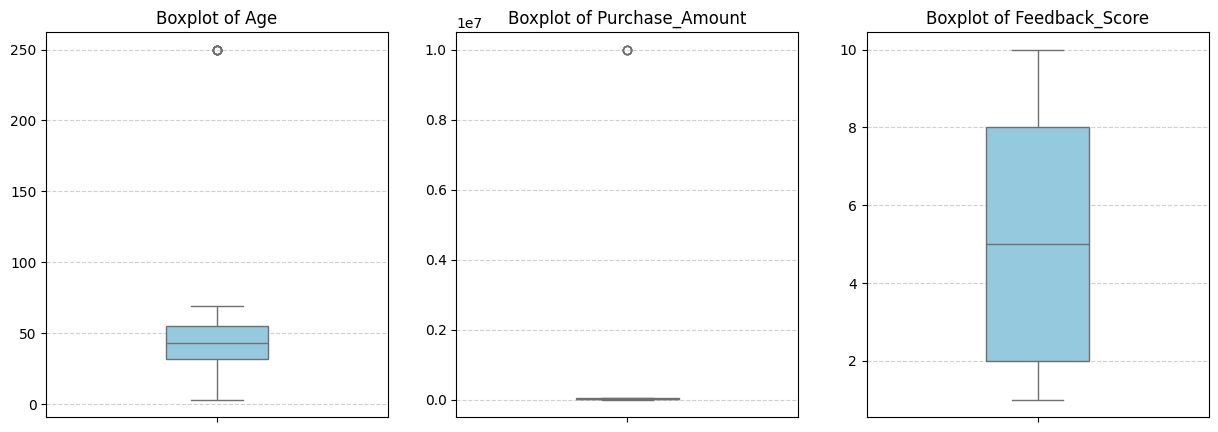

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [44]:
from scipy import stats

# Calculating Z-scores for Age and Purchase_Amount
Z_score = np.abs(stats.zscore(data_clean[['Age', 'Purchase_Amount']]))

# Identify outliers (any row with z > 3)
outlier = (Z_score > 3).any(axis=1)
print(f"Number of outliers detected (Z-score method): {outlier.sum()}")

# Display sample outliers
data_clean[outlier]

Number of outliers detected (Z-score method): 11


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
470,CUST6977,Tyler Stout,female,250,chennai,2022-05-21,2025-05-31,3554.0,2.0,hudsonsandra@example.net,5752427586,india
932,CUST1207,Cathy Robinson,female,250,delhi,2024-10-24,2025-10-01,23012.0,6.0,jefftaylor@example.org,1244788430,india
2383,CUST3987,Erica Johnson,male,47,kolkata,2020-11-03,2025-08-10,9999999.0,5.0,bflowers@example.com,747807729,india
3368,CUST7314,Gavin Yates,male,50,bangalore,2022-06-30,2025-03-22,9999999.0,10.0,millermichael@example.com,1481715956,india
4674,CUST8481,Denise Combs,female,62,mumbai,2024-10-06,2025-07-08,9999999.0,3.0,cmorales@example.net,2931912910,india
4692,CUST10561,Richard Brown,female,58,mumbai,2024-04-13,2025-09-08,9999999.0,2.0,kevintaylor@example.net,7047881855,india
5279,CUST4536,Alexandra Ramos,male,250,chennai,2021-09-30,2025-03-03,3296.0,10.0,drakemichelle@example.org,5651607326,india
5949,CUST7041,Joseph Young,male,250,delhi,2022-01-20,2024-11-26,1131.0,8.0,pmckenzie@example.org,9456700786,india
6085,CUST8110,Betty Cole,female,250,bangalore,2024-01-07,2025-04-12,25974.0,1.0,dmitchell@example.net,366613689,india
6615,CUST10236,Brittney Boyd,male,250,kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,india


In [45]:
data_clean = data_clean[~outlier]

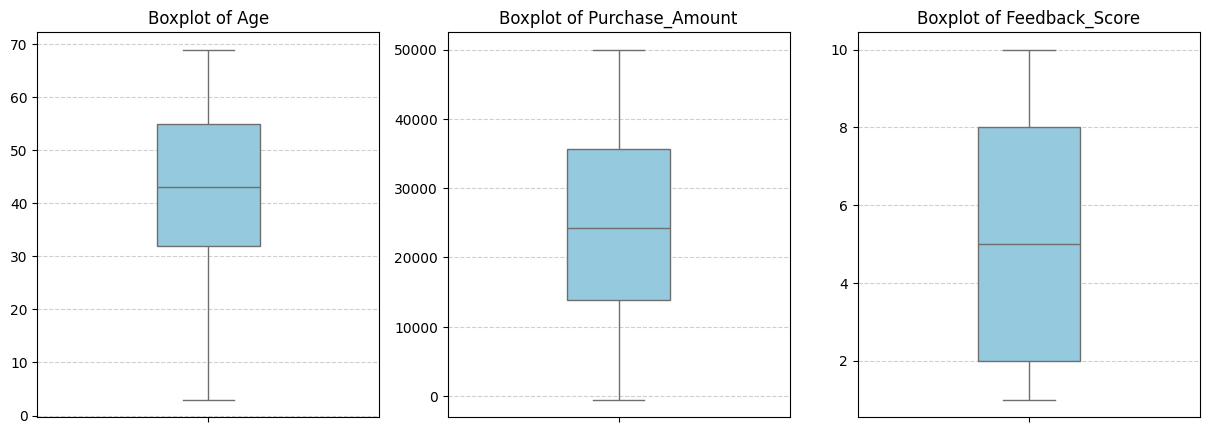

In [46]:
cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()